In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
sys.path.append("/Users/kjkelly/Dropbox/GitHub/muB_oscillation")
import itertools
from MicroTools import *

MiniBooNE_Signal = np.loadtxt(f"{mb_data_osctables}/miniboone_numunuefullosc_ntuple.dat")
MiniBooNE_Signal_PANM_True = np.loadtxt(f"{mb_data_osctables}/dm-MB-events-table-TrueEnu.dat")
MB_True_Bins = np.array([0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000])
Ereco = MiniBooNE_Signal[:,0] # MeV
Etrue = MiniBooNE_Signal[:,1] # MeV
Length = MiniBooNE_Signal[:,2]/100 # meters
Weight = MiniBooNE_Signal[:,3]
event_rate = MiniBooNE_Signal_PANM_True[57,1:]
# LSND & MiniBooNE joint best-fit from 1911.01447
Um4Sq_bf, gDm4_bf = 0.063, 1.17
# MiniBooNE 3+1 best fit
ssq_bf, dmsq_bf = 0.83, 0.036
Pmm_weighted = [((1-Um4Sq_bf)**2 + Um4Sq_bf**2*np.exp(-gDm4_bf**2*Length[i]/(32*np.pi*Ereco[i])))*Weight[i] for i in range(MiniBooNE_Signal.shape[0])]
Pme_weighted = [(Um4Sq_bf*(1-np.exp(-gDm4_bf**2*Length[i]/(32*np.pi*Ereco[i]))))*Weight[i] for i in range(MiniBooNE_Signal.shape[0])]
Pmm_weighted_nodecay = [(1-ssq_bf*np.sin(1.267*dmsq_bf*Length[i]/Ereco[i])**2)*Weight[i] for i in range(MiniBooNE_Signal.shape[0])]
Pme_weighted_nodecay = [ssq_bf*np.sin(1.267*dmsq_bf*Length[i]/Ereco[i])**2*Weight[i] for i in range(MiniBooNE_Signal.shape[0])]

fig,ax = plt.subplots(1,1,figsize = (6,4),gridspec_kw=dict(left=0.1, right=0.98,bottom=0.1, top=0.93))
ax.hist(Ereco/1000,bins=(0.200, 0.250, 0.300, 0.350, 0.400, 0.450, 0.500, 0.600, 0.800, 1.000, 1.500, 2.000, 2.500, 3.000),range=(0.2,3.0),weights=Pme_weighted_nodecay)
ax.set_xlabel("Energy (GeV)", fontsize = 16)
ax.set_ylabel("Signal Rate", fontsize = 16)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.grid(linestyle="--")
ax.legend(loc="upper right",fontsize=16)
fig.suptitle(r'Monte Carlo Signal Rate', fontsize = 17)
fig.savefig("signal_rate_mu_e_reco_monte.png")

FileNotFoundError: /Users/kjkelly/Library/CloudStorage/Dropbox/GitHub/muB_oscillation/MicroTools/MB_data//MB_osc_tables//miniboone_numunuefullosc_ntuple.dat not found.

No handles with labels found to put in legend.


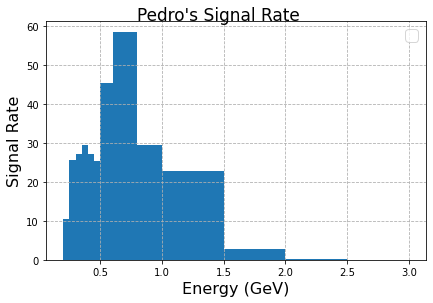

In [26]:

bin_widths = [MB_True_Bins[i + 1] - MB_True_Bins[i] for i in range(len(MB_True_Bins) - 1)]
fig2,ax2 = plt.subplots(1,1,figsize = (6,4),gridspec_kw=dict(left=0.1, right=0.98,bottom=0.1, top=0.93))
ax2.bar(MB_True_Bins[:-1], event_rate, width=bin_widths, align='edge')
ax2.set_xlabel("Energy (GeV)", fontsize = 16)
ax2.set_ylabel("Signal Rate", fontsize = 16)
ax2.grid(linestyle="--")
ax2.legend(loc="upper right",fontsize=16)
fig2.suptitle(r"Pedro's Signal Rate", fontsize = 17)
fig2.savefig("signal_rate_mu_e_reco_pedro.png")